# Load datasets

In [1]:
from bs4 import BeautifulSoup
from collections import defaultdict
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
filesuffix1='with_topics_LDA_2024-12-29'
filesuffix2='dov2vec_kmeans10_2025-01-01'
filesuffix3='InstructorEmbeddings_PCA100_kmeans10_2025-01-01'


In [3]:
path='/Users/gaelleba/Library/CloudStorage/Dropbox/CNAM/RCP216/RCP216_PROJECT/2-AbstractsCollection/Classification_results/'
def openabstract(filesuffix):
    fullpath=f'{path}articles_{filesuffix}.csv'
    df=pd.read_csv(fullpath, sep=',', header=0)
    return df

df_lda = openabstract(filesuffix1)
df_doc2vec = openabstract(filesuffix2)
df_instructor = openabstract(filesuffix3)




In [5]:

# Merge the assigned_topic columns from df_1 to df_4 using the PMID column to match them
merged_df = df_lda[['PMID', 'Title', 'year', "drug_name_list", 'assigned_topic']].rename(columns={'assigned_topic': 'LDA'})
merged_df = merged_df.merge(df_doc2vec[['PMID', 'assigned_topic']].rename(columns={'assigned_topic': 'doc2vec'}), on='PMID', how='inner')
merged_df = merged_df.merge(df_instructor[['PMID', 'assigned_topic']].rename(columns={'assigned_topic': 'instructor'}), on='PMID', how='inner')

# Print results
merged_df.head(10)

,PMID,Title,year,drug_name_list,LDA,doc2vec,instructor
0,24530007,Oscillatory spatial profile of alcohol's effec...,2014,['Ethanol'],1,8,0
1,16737455,Effects of alcohol on sleep and the sleep elec...,2006,['Ethanol'],2,9,1
2,24565928,Spatio-temporal processing of words and nonwor...,2014,['Ethanol'],1,7,4
3,24255944,Alcohol reduces cross-frequency theta-phase ga...,2014,['Ethanol'],1,7,0
4,11204871,Time-of-day effects of ethanol consumption on ...,2000,['Ethanol'],5,5,0
5,28722214,Impairment due to combined sleep restriction a...,2017,['Ethanol'],5,2,1
6,17727957,Effects of alcohol on TMS-evoked N100 responses.,2007,['Ethanol'],1,7,0
7,12820862,Convergent and divergent effects of odors and ...,2003,['Ethanol'],6,7,9
8,29329355,When the brain changes its mind: Oscillatory d...,2018,['Ethanol'],6,7,9
9,15905011,Effects of alcohol on spontaneous neuronal osc...,2005,['Ethanol'],1,8,0


In [8]:
merged_df['LDA'] = merged_df['LDA'].replace(2, 'Sleep_LDA')
merged_df['LDA'] = merged_df['LDA'].replace(4, 'Drugs effects volunteers_LDA')
merged_df['LDA'] = merged_df['LDA'].replace(7, 'Schizophrenia_LDA')
merged_df['LDA'] = merged_df['LDA'].replace(8, 'Anesthesia/Sedation_LDA')

merged_df['doc2vec'] = merged_df['doc2vec'].replace(2, 'Anesthesia/Sedation_doc2vec')
merged_df['doc2vec'] = merged_df['doc2vec'].replace(3, 'Sleep_doc2vec')
merged_df['doc2vec'] = merged_df['doc2vec'].replace(9, 'Sleep_doc2vec')
merged_df['doc2vec'] = merged_df['doc2vec'].replace(4, "Drugs effects volunteers_doc2vec")

merged_df['instructor'] = merged_df['instructor'].replace(3, 'Sleep_instructor')
merged_df['instructor'] = merged_df['instructor'].replace(5, "Drugs effects volunteers_instructor")
merged_df['instructor'] = merged_df['instructor'].replace(6, 'Schizophrenia_instructor')


In [9]:
# Recode numerical values in LDA, doc2vec, and instructor columns as "other"
merged_df['LDA'] = merged_df['LDA'].apply(lambda x: 'other' if isinstance(x, int) else x)
merged_df['doc2vec'] = merged_df['doc2vec'].apply(lambda x: 'other' if isinstance(x, int) else x)
merged_df['instructor'] = merged_df['instructor'].apply(lambda x: 'other' if isinstance(x, int) else x)

# Print the updated dataframe
merged_df.head(10)

,PMID,Title,year,drug_name_list,LDA,doc2vec,instructor
0,24530007,Oscillatory spatial profile of alcohol's effec...,2014,['Ethanol'],other,other,other
1,16737455,Effects of alcohol on sleep and the sleep elec...,2006,['Ethanol'],Sleep_LDA,Sleep_doc2vec,other
2,24565928,Spatio-temporal processing of words and nonwor...,2014,['Ethanol'],other,other,other
3,24255944,Alcohol reduces cross-frequency theta-phase ga...,2014,['Ethanol'],other,other,other
4,11204871,Time-of-day effects of ethanol consumption on ...,2000,['Ethanol'],other,other,other
5,28722214,Impairment due to combined sleep restriction a...,2017,['Ethanol'],other,Anesthesia/Sedation_doc2vec,other
6,17727957,Effects of alcohol on TMS-evoked N100 responses.,2007,['Ethanol'],other,other,other
7,12820862,Convergent and divergent effects of odors and ...,2003,['Ethanol'],other,other,other
8,29329355,When the brain changes its mind: Oscillatory d...,2018,['Ethanol'],other,other,other
9,15905011,Effects of alcohol on spontaneous neuronal osc...,2005,['Ethanol'],other,other,other


# Evolution of topics over time

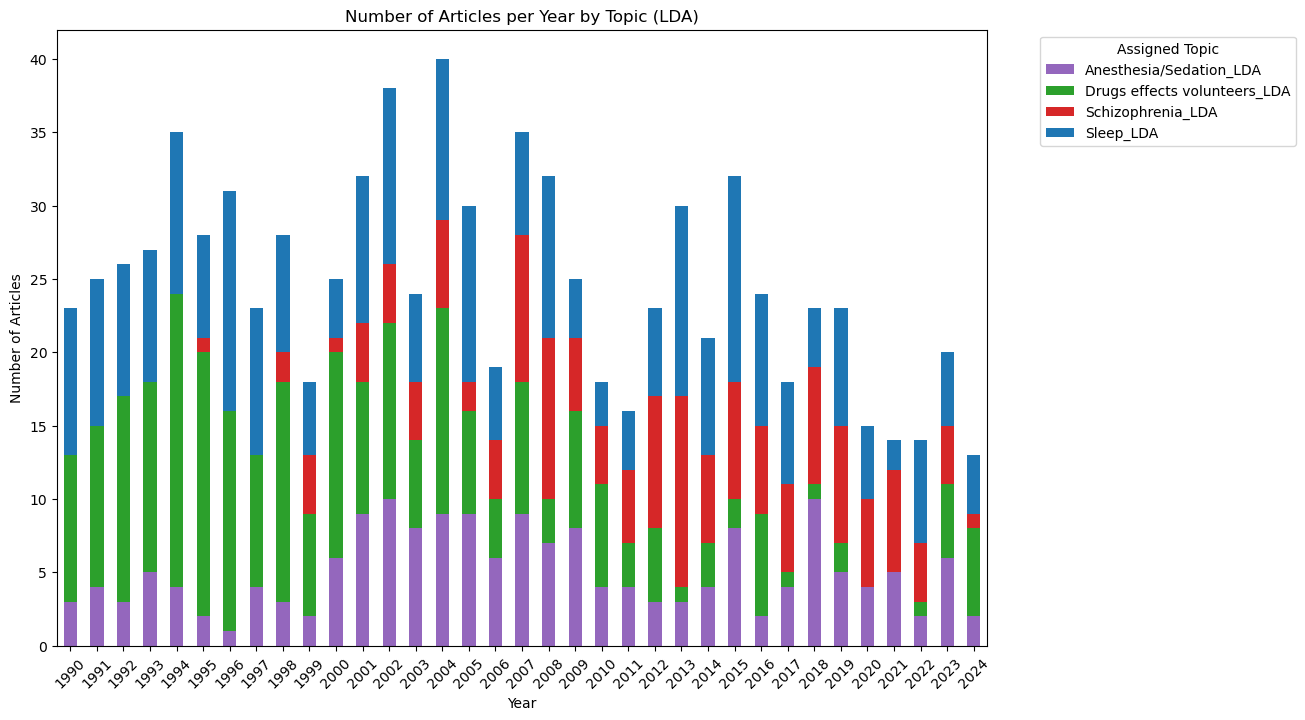

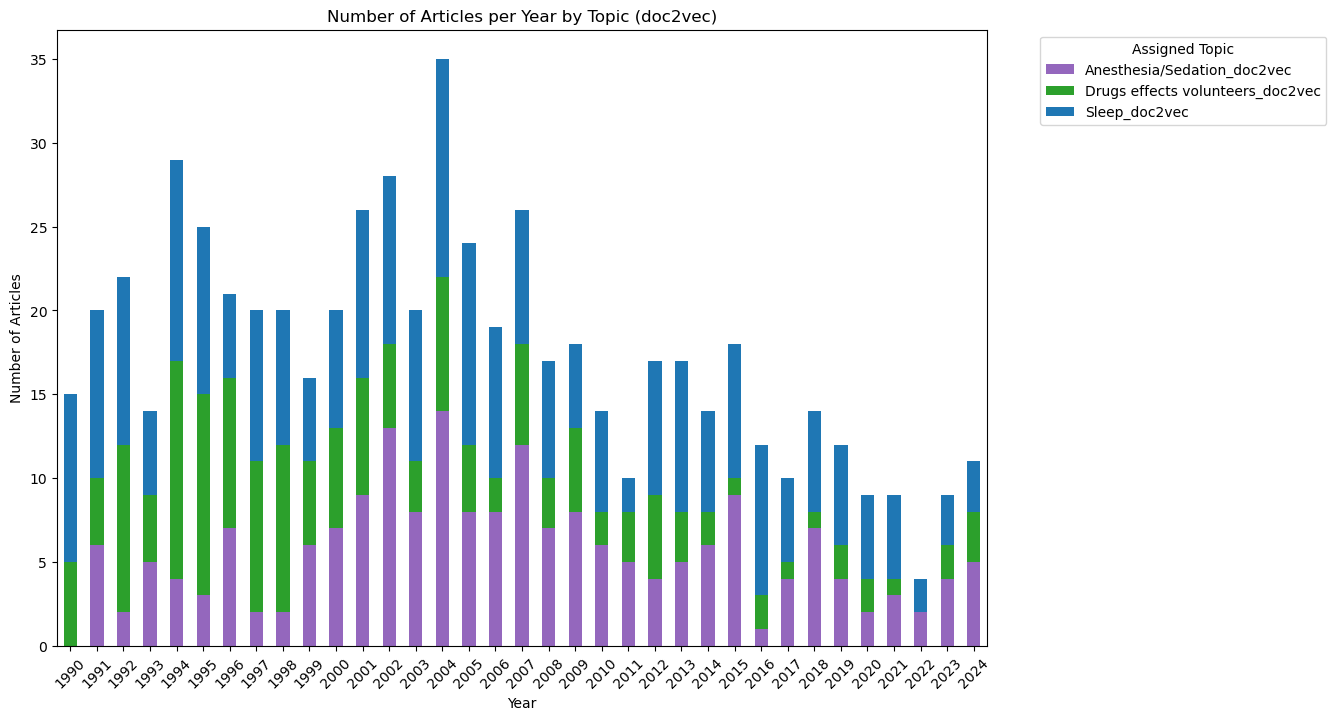

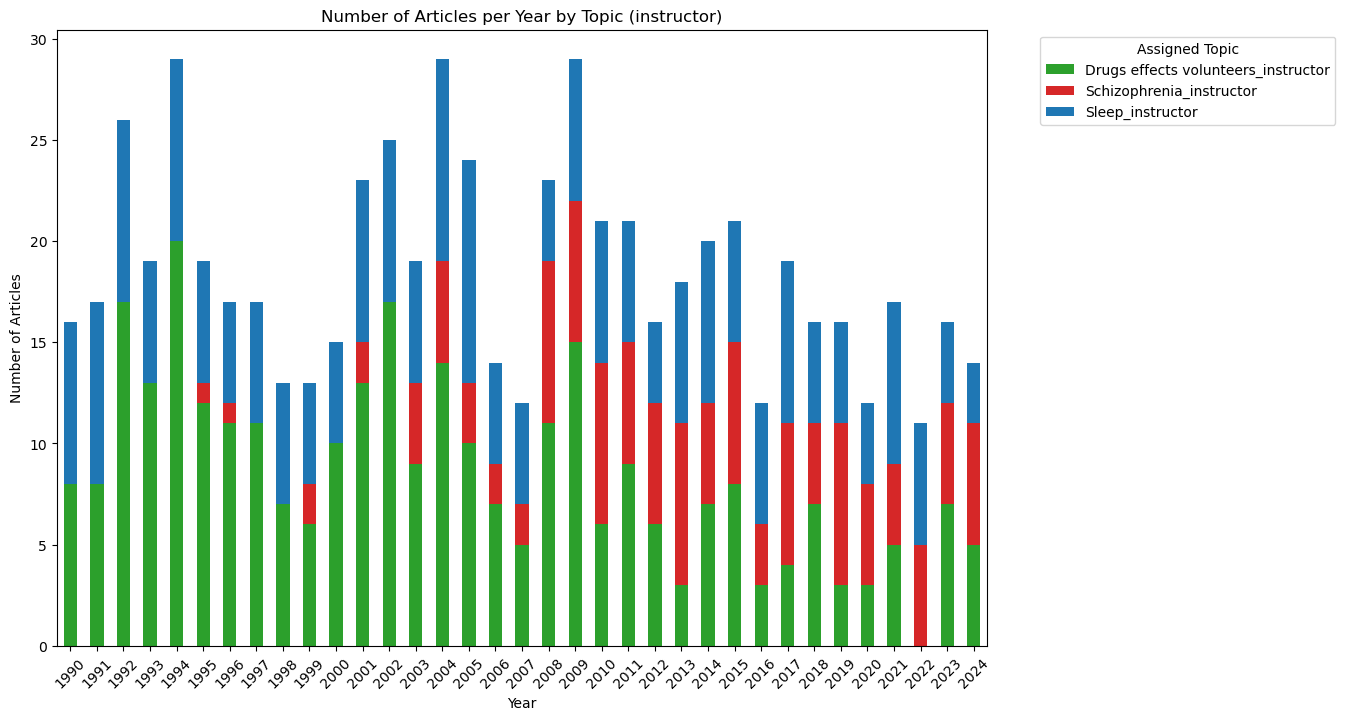

In [10]:

# Define a color map for each topic
color_map = {
    'Sleep_LDA': '#1f77b4',  # dark blue
    'Drugs effects volunteers_LDA': '#2ca02c',  # dark green
    'Schizophrenia_LDA': '#d62728',  # dark red
    'Anesthesia/Sedation_LDA': '#9467bd',  # dark purple
    'Sleep_doc2vec': '#1f77b4',  # dark blue
    'Drugs effects volunteers_doc2vec': '#2ca02c',  # dark green
    'Schizophrenia_doc2vec': '#d62728',  # dark red
    'Anesthesia/Sedation_doc2vec': '#9467bd',  # dark purple
    'Sleep_instructor': '#1f77b4',  # dark blue
    'Drugs effects volunteers_instructor': '#2ca02c',  # dark green
    'Schizophrenia_instructor': '#d62728',  # dark red
    'Anesthesia/Sedation_instructor': '#9467bd'  # dark purple
}

# Update the evolution function to use the color map
def evolution(df, method):
    # Group by year and assigned_topic, then count the number of articles
    year_topic = df[df[method] != 'other'].groupby(['year', method]).size().unstack(fill_value=0)

    # Plot the data using stacked bars
    plt.figure(figsize=(12, 8))
    year_topic.plot(kind='bar', stacked=True, ax=plt.gca(), color=[color_map.get(x, '#333333') for x in year_topic.columns])
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.title(f'Number of Articles per Year by Topic ({method})')
    plt.xticks(rotation=45)
    plt.legend(title='Assigned Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

evolution(merged_df, 'LDA')
evolution(merged_df, 'doc2vec')
evolution(merged_df, 'instructor')

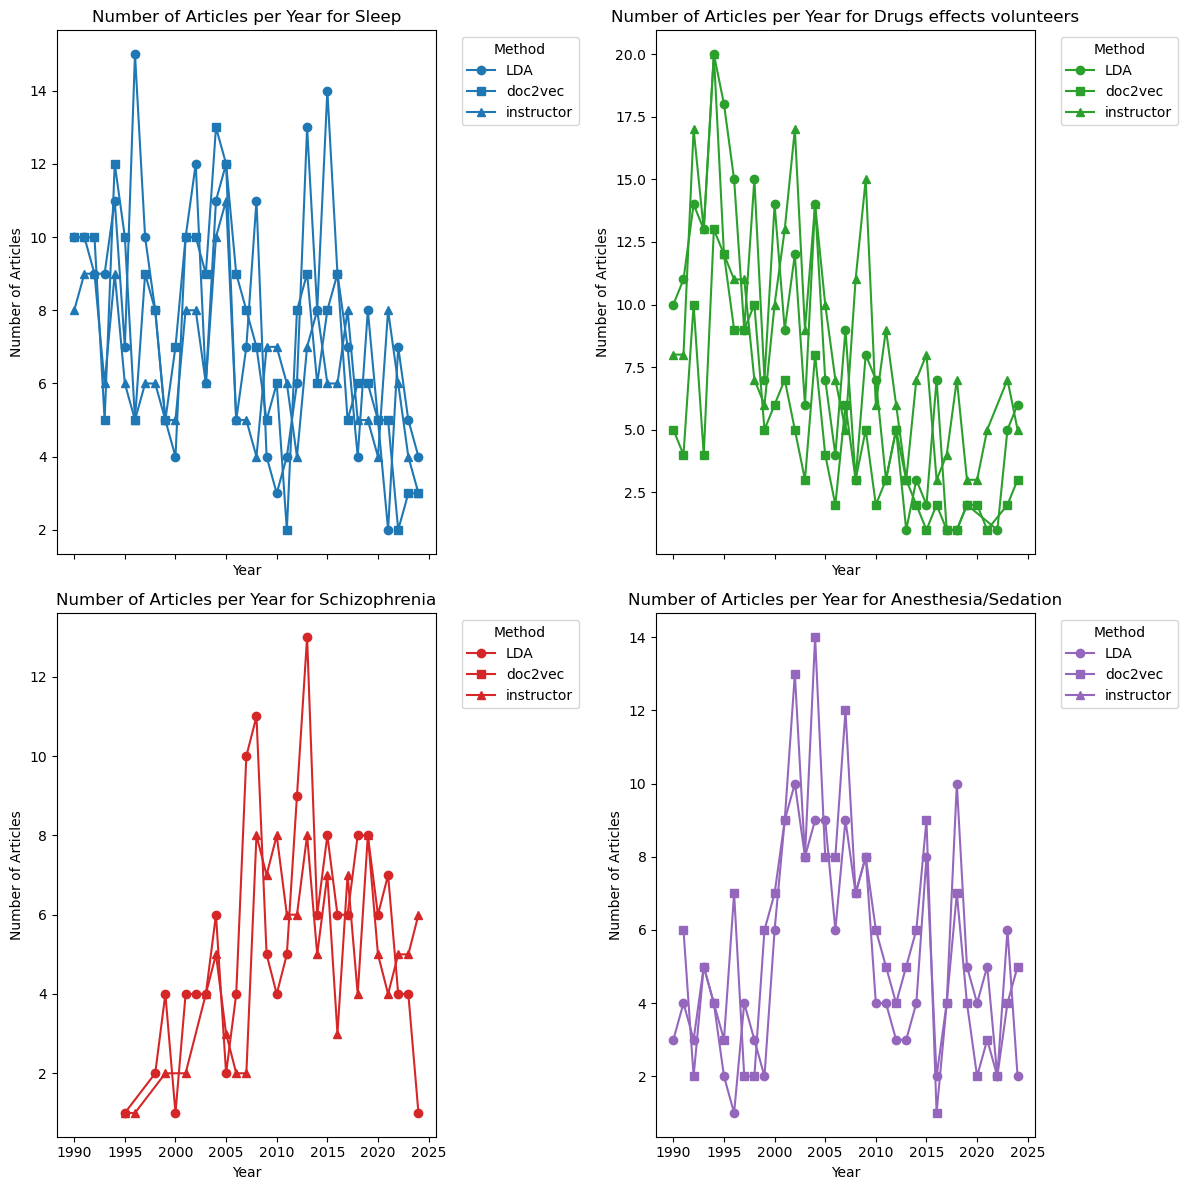

In [11]:
merged_df2 = merged_df.copy()
merged_df2['LDA'] = merged_df2['LDA'].replace('Sleep_LDA', "Sleep")
merged_df2['LDA'] = merged_df2['LDA'].replace('Drugs effects volunteers_LDA', 'Drugs effects volunteers')
merged_df2['LDA'] = merged_df2['LDA'].replace('Schizophrenia_LDA', 'Schizophrenia')
merged_df2['LDA'] = merged_df2['LDA'].replace('Anesthesia/Sedation_LDA', 'Anesthesia/Sedation')

merged_df2['doc2vec'] = merged_df2['doc2vec'].replace('Anesthesia/Sedation_doc2vec', 'Anesthesia/Sedation')
merged_df2['doc2vec'] = merged_df2['doc2vec'].replace('Sleep_doc2vec', 'Sleep')
merged_df2['doc2vec'] = merged_df2['doc2vec'].replace("Drugs effects volunteers_doc2vec", 'Drugs effects volunteers')

merged_df2['instructor'] = merged_df2['instructor'].replace('Sleep_instructor',  'Sleep')
merged_df2['instructor'] = merged_df2['instructor'].replace("Drugs effects volunteers_instructor", 'Drugs effects volunteers')
merged_df2['instructor'] = merged_df2['instructor'].replace('Schizophrenia_instructor', 'Schizophrenia')

# Define a shape map for each method
shape_map = {
    'LDA': 'o',  # circle
    'doc2vec': 's',  # square
    'instructor': '^'  # triangle
}

color_map2 = {
    'Sleep': '#1f77b4',  # dark blue
    'Drugs effects volunteers': '#2ca02c',  # dark green
    'Schizophrenia': '#d62728',  # dark red
    'Anesthesia/Sedation': '#9467bd',  # dark purple
}

methods = ['LDA', 'doc2vec', 'instructor']

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
axes = axes.flatten()

topics = ['Sleep', 'Drugs effects volunteers', 'Schizophrenia', 'Anesthesia/Sedation']

for i, topic in enumerate(topics):
    for method in methods:
        year_topic = merged_df2[merged_df2[method] == topic].groupby('year').size()
        axes[i].plot(year_topic.index, year_topic.values, label=method, color=color_map2[topic], marker=shape_map[method])
    axes[i].set_title(f'Number of Articles per Year for {topic}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Articles')
    axes[i].legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


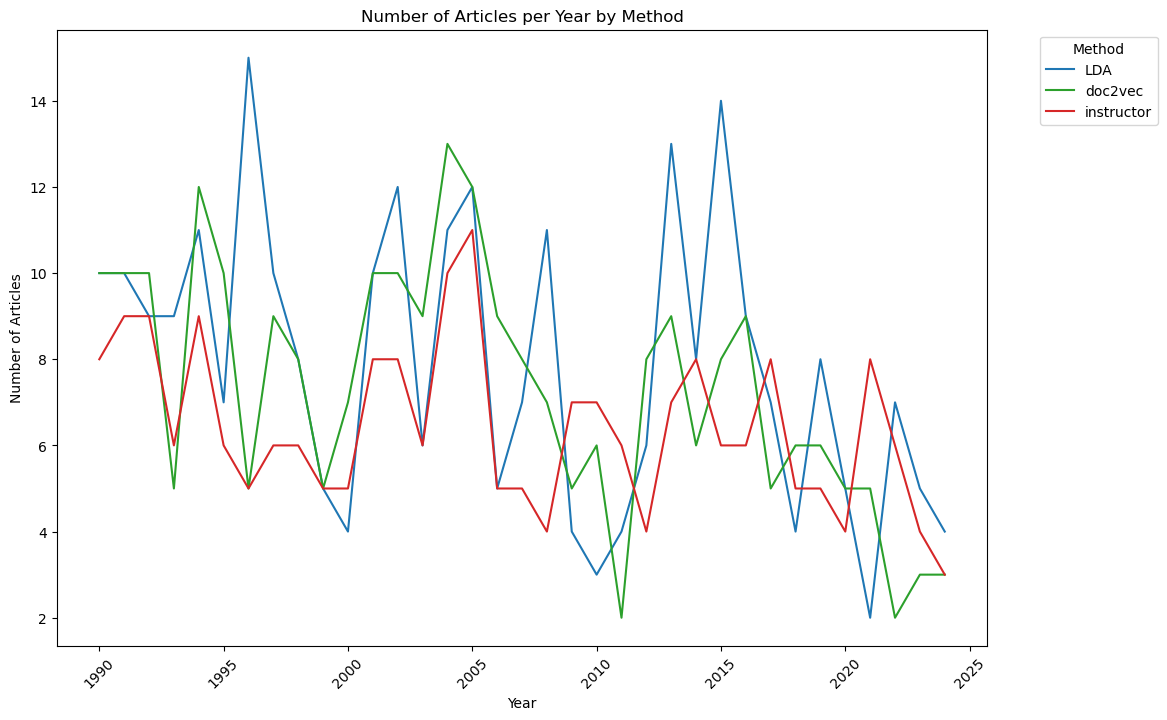

In [12]:
# Group by year and assigned_topic, then count the number of articles
methods = ['LDA', 'doc2vec', 'instructor']
sleep_df_list = []

for method in methods:
    temp_df = merged_df2[merged_df2[method].str.contains('Sleep')].copy()
    temp_df['method'] = method
    sleep_df_list.append(temp_df)

sleep_df = pd.concat(sleep_df_list)

# Group by year and method, then count the number of articles
year_method = sleep_df.groupby(['year', 'method']).size().unstack(fill_value=0)

# Define a color map for each method
color_map = {
    'LDA': '#1f77b4',  # dark blue
    'doc2vec': '#2ca02c',  # dark green
    'instructor': '#d62728'  # dark red
}

# Plot the data using stacked bars
plt.figure(figsize=(12, 8))
year_method.plot(ax=plt.gca(), color=[color_map[method] for method in year_method.columns])
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year by Method')
plt.xticks(rotation=45)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Wordcloud titles Sleep studies

In [14]:
sleep_titles_lda = merged_df2[merged_df2['LDA'] == 'Sleep']['Title'].tolist()
sleep_titles_doc2vec = merged_df2[merged_df2['doc2vec'] == 'Sleep']['Title'].tolist()
sleep_titles_instructor = merged_df2[merged_df2['instructor'] == 'Sleep']['Title'].tolist()

sleep_drugs_lda = merged_df2[merged_df2['LDA'] == 'Sleep']['drug_name_list'].tolist()
sleep_drugs_doc2vec = merged_df2[merged_df2['doc2vec'] == 'Sleep']['drug_name_list'].tolist()
sleep_drugs_instructor = merged_df2[merged_df2['instructor'] == 'Sleep']['drug_name_list'].tolist()

In [27]:
import os
import sys
print(sys.executable)    # vérification
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable



/Users/gaelleba/anaconda3/envs/sparkEnv/bin/python


In [28]:

import pyspark
from pyspark.sql import SparkSession
import sparknlp
sparknlp.start()

#pip install --upgrade spark-nlp
print(sparknlp.version())

5.5.1


In [29]:
from pyspark.sql.functions import lit
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import udf
spark = SparkSession.builder.getOrCreate()

# Define the schema
schema = StructType([
    StructField("method", StringType(), True),
    StructField("titles", StringType(), True)
])

schema2 = StructType([
    StructField("method", StringType(), True),
    StructField("drugs", StringType(), True)
])

# Create DataFrame
data = [
    ("LDA", " ".join(sleep_titles_lda)),
    ("doc2vec", " ".join(sleep_titles_doc2vec)),
    ("instructor", " ".join(sleep_titles_instructor))
]

data2 = [
    ("LDA", " ".join(sleep_drugs_lda)),
    ("doc2vec", " ".join(sleep_drugs_doc2vec)),
    ("instructor", " ".join(sleep_drugs_instructor))
]

Titles = spark.createDataFrame(data, schema=schema)
Titles.show(10, truncate=500)

Drugs = spark.createDataFrame(data2, schema=schema2)
Drugs.show(10, truncate=500)

+----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    method|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [43]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml import Pipeline
from sparknlp.pretrained import PretrainedPipeline

# Assemblage du document
documentAssembler = DocumentAssembler() \
                      .setCleanupMode("inplace") \
                      .setInputCol("titles") \
                      .setOutputCol("document")

# Tokenisation
tokenizer = Tokenizer() \
    .setInputCols(['document']) \
    .setOutputCol('token')
    # suppression des caracteres spéciaux tout en gardant les expressions alphanumériques

# Normalisation
normalizer = Normalizer() \
        .setInputCols(["token"]) \
        .setOutputCol("normalized") \
        .setLowercase(True) \
        .setCleanupPatterns(["""[^a-zA-Z\s]"""]) # remove all non-alphabetic characters

# Lemmatisation
lemmatizer = LemmatizerModel.pretrained() \
    .setInputCols(['normalized']) \
    .setOutputCol('lemma')

# Suppression des mots vides
stopwords_cleaner = StopWordsCleaner.pretrained() \
    .setInputCols(['lemma']) \
    .setOutputCol('clean_lemma')


finisher = Finisher() \
    .setInputCols(["clean_lemma"])\
    .setOutputCols("output")

# Pipeline
pipeline_lemma = Pipeline(stages=[
    documentAssembler,
    tokenizer,
    normalizer,
    lemmatizer,
    stopwords_cleaner,
    finisher
])
    
# Application du pipeline
model_lemma = pipeline_lemma.fit(Titles)
result_lemma = model_lemma.transform(Titles)
result_lemma.printSchema()
result_lemma.select("titles", "output").show(10, 300)

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_38517/2437267976.py:25: SyntaxWarning: invalid escape sequence '\s'
  .setCleanupPatterns(["""[^a-zA-Z\s]"""]) # remove all non-alphabetic characters


lemma_antbnc download started this may take some time.


25/01/12 12:29:56 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.


25/01/12 12:29:59 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


Approximate size to download 2.9 KB
[OK!]
root
 |-- method: string (nullable = true)
 |-- titles: string (nullable = true)
 |-- output: array (nullable = true)
 |    |-- element: string (containsNull = true)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                          

In [48]:
import pandas as pd
# Extraction des caractéristiques PCA
titles_text = result_lemma.toPandas()
titles_text.head(10)


,method,titles,output
0,LDA,Effects of alcohol on sleep and the sleep elec...,"[effect, alcohol, sleep, sleep, electroencepha..."
1,doc2vec,Effects of alcohol on sleep and the sleep elec...,"[effect, alcohol, sleep, sleep, electroencepha..."
2,instructor,Late-afternoon ethanol intake affects nocturna...,"[lateafternoon, ethanol, intake, affect, noctu..."


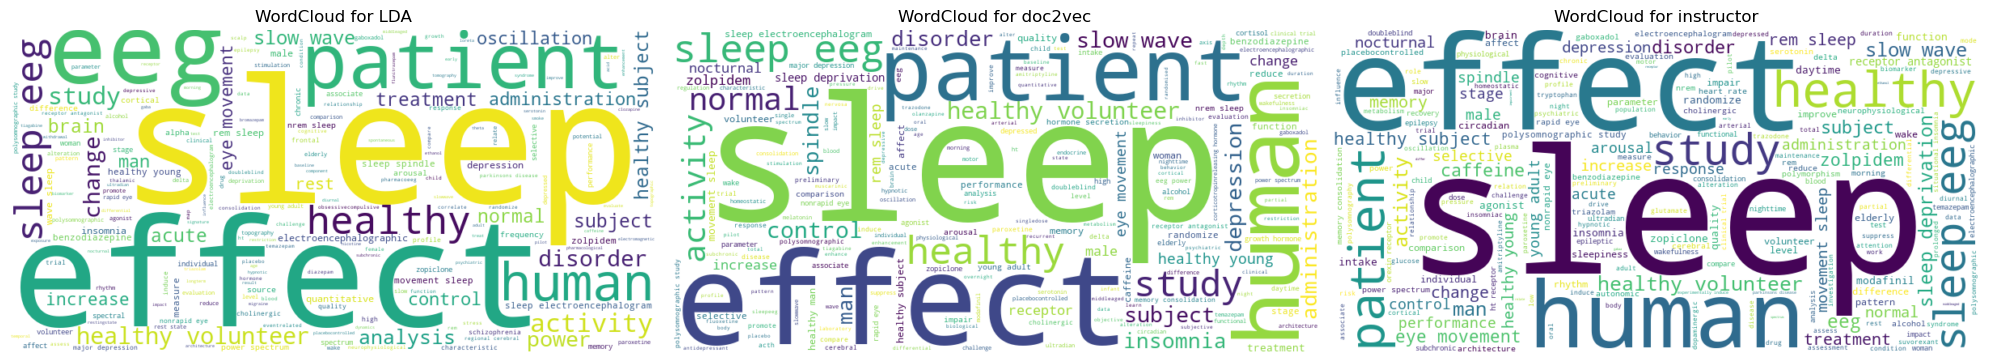

In [49]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

methods = ['LDA', 'doc2vec', 'instructor']
titles_text = result_lemma.toPandas()

for ax, method in zip(axes, methods):
    text = " ".join(titles_text[titles_text['method'] == method]['output'].explode())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'WordCloud for {method}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [30]:
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml import Pipeline
from sparknlp.pretrained import PretrainedPipeline

# Assemblage du document
documentAssembler = DocumentAssembler() \
                      .setCleanupMode("inplace") \
                      .setInputCol("drugs") \
                      .setOutputCol("document")

# Tokenisation
tokenizer = Tokenizer() \
    .setInputCols(['document']) \
    .setOutputCol('token')
    # suppression des caracteres spéciaux tout en gardant les expressions alphanumériques

# Normalisation
normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized") \
    .setLowercase(True) \
    .setCleanupPatterns(["""[^a-zA-Z\s]"""]) # remove all non-alphabetic characters

# Lemmatisation
lemmatizer = LemmatizerModel.pretrained() \
    .setInputCols(['normalized']) \
    .setOutputCol('lemma')

# Suppression des mots vides
stopwords_cleaner = StopWordsCleaner.pretrained() \
    .setInputCols(['lemma']) \
    .setOutputCol('clean_lemma')

finisher = Finisher() \
    .setInputCols(["clean_lemma"])\
    .setOutputCols("output")

# Pipeline
pipeline_drugs = Pipeline(stages=[
    documentAssembler,
    tokenizer,
    normalizer,
    lemmatizer,
    stopwords_cleaner,
    finisher
])
    
# Application du pipeline
model_drugs = pipeline_drugs.fit(Drugs)
result_drugs = model_drugs.transform(Drugs)
result_drugs.printSchema()
result_drugs.select("drugs", "output").show(10, 300)

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ym/bgkz_f9x4f7dygsy5ydxzyb80000gn/T/ipykernel_42751/4281858700.py:25: SyntaxWarning: invalid escape sequence '\s'
  .setCleanupPatterns(["""[^a-zA-Z\s]"""]) # remove all non-alphabetic characters


lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[ | ]

25/01/12 17:30:16 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/01/12 17:30:17 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
Download done! Loading the resource.
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[ | ]

25/01/12 17:30:21 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/01/12 17:30:22 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.
25/01/12 17:30:22 WARN S3AbortableInputStream: Not all bytes were read from the S3ObjectInputStream, aborting HTTP connection. This is likely an error and may result in sub-optimal behavior. Request only the bytes you need via a ranged GET or drain the input stream after use.


stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
Download done! Loading the resource.


25/01/12 17:30:23 WARN StopWordsCleaner: Default locale set was [en_CH]; however, it was not found in available locales in JVM, falling back to en_US locale. Set param `locale` in order to respect another locale.


[OK!]
root
 |-- method: string (nullable = true)
 |-- drugs: string (nullable = true)
 |-- output: array (nullable = true)
 |    |-- element: string (containsNull = true)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                               

In [31]:
import pandas as pd
# Export to Pandas DF
drugs_text = result_drugs.toPandas()
drugs_text.head(10)


,method,drugs,output
0,LDA,"['Ethanol'] ['Ethanol', 'Xanthine'] ['Ethanol'...","[ethanol, ethanol, xanthine, ethanol, ethanol,..."
1,doc2vec,"['Ethanol'] ['Ethanol', 'Xanthine'] ['Ethanol'...","[ethanol, ethanol, xanthine, ethanol, benzodia..."
2,instructor,"['Ethanol', 'Xanthine'] ['Ethanol', 'Benzodiaz...","[ethanol, xanthine, ethanol, benzodiazepine, e..."


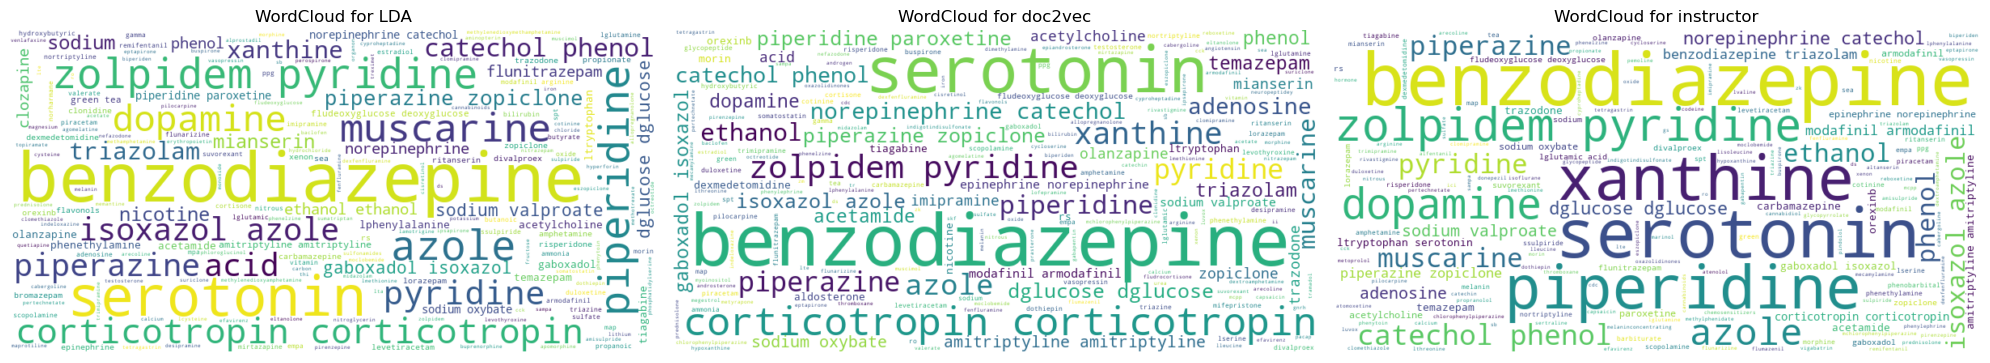

In [32]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

methods = ['LDA', 'doc2vec', 'instructor']
drugs_text = result_drugs.toPandas()

for ax, method in zip(axes, methods):
    text = " ".join(drugs_text[drugs_text['method'] == method]['output'].explode())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'WordCloud for {method}')
    ax.axis('off')

plt.tight_layout()
plt.show()